# Research of the market of computer games

The online store "Stream" sells computer games all over the world. Data on game sales such as user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow  to bet on a potentially popular product and plan advertising campaigns. We have data before 2016. Let's imagine that it's December 2016, and we are planning a campaign for 2017. It is necessary to work out the principle of working with the data.

## Studying the date

In [33]:
# getting the table the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [36]:
# getting general info on the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


###  Conclusion

The table contains 16715 rows and 11 columns, it has the data of the object and float64 types. Judging by the amount of data, the columns `Year_of_Release`, `Critic_Score`, `User_Score` and `Rating` have some gaps. We also see capital letters in the column names, it's better to correct them.

## Data preprocessing

In [37]:
# let's bring the data to the lower case
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [38]:
# convert the data type in Year_of_Release to datetime    
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [39]:
# in the user_score column we can change the data to float and replace the tbd values (to be specified) with nan
data['user_score'].unique()
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [40]:
# we have reviewed the data in the rating column, let's replace the gaps with indefinite
data['rating'].unique()
data['rating'] = data['rating'].fillna('indefinite')

In [41]:
# let's check the gaps
# using the isna() method to find missing values in columns where the data is obviously missing
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

The share of the gaps in name and genre is 1%,  we can just leave them there

In [42]:
# # there are not so many gaps in years (1.6%), they can be deleted
data.dropna(subset = ['year_of_release'], inplace=True)

In [43]:
# counting the revenue for all regions and record it in a new column
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,indefinite,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,indefinite,31.38


### Conclusion

As a result of data preprocessing, the data type in `Year_of_Release` was replaced with datetime and in the `user_score` graph with float. In the `rating column`, I replaced the gaps with indefinite, since they will interfere with future analysis. The gaps in `year_of_release` the gaps were removed, since their share is 1.6%. Column `names` was changed to lowercase. A column was also created with calculations of total revenue for all regions.

## Exploratory data analysis

### How many games were released in different years

,number_of_games
year_of_release,
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136
2006-01-01,1006
2005-01-01,939
2002-01-01,829
2003-01-01,775


<AxesSubplot:title={'center':'Games released by year'}, xlabel='year_of_release'>

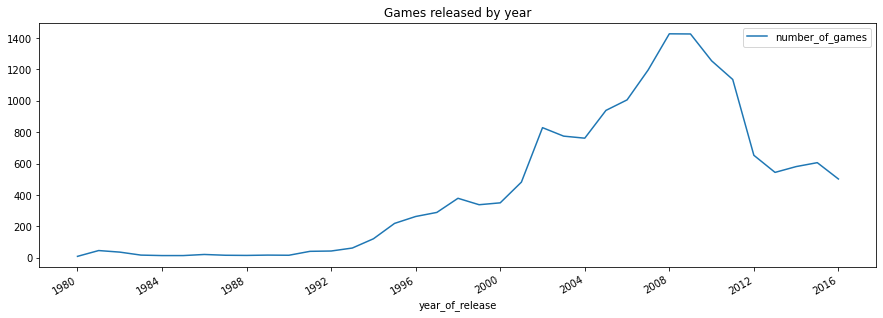

In [45]:
# grouping the number of games by year and sort them in descending order
game_years = data.groupby(['year_of_release']).agg({'year_of_release' : 'count'})
game_years.columns = ['number_of_games']
display(game_years.sort_values(by='number_of_games', ascending = False))
game_years.sort_values(by='number_of_games', ascending = False).plot(figsize=(15,5), title = 'Games released by year')

The table and the graph show that majority of games were released in the period from 2002 to 2011, in 2012 there was a drop in the release of games, since then the growth remained insignificant. The peak of the release of games was observed from 2007 to 2009. 

### On which platforms were the games released in different years

In [46]:
# let's build a table where we can see the platforms with the largest number of sales
platform_sales = data.groupby(['platform']).agg({'total_sales' : 'sum'})
platform_sales.columns = ['platform_sales']
display(platform_sales.sort_values(by='platform_sales', ascending = False))

,platform_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The table shows that the most popular platforms were PS2, X360, PS3, Wii.

<AxesSubplot:title={'center':'Sales on different platforms by year'}, xlabel='year_of_release'>

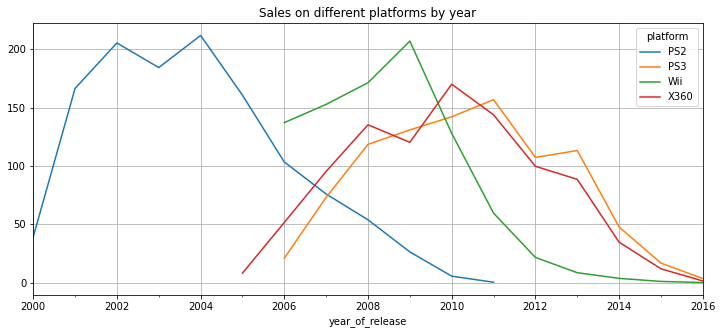

In [47]:
data.query('platform in ["PS2", "X360", "PS3", "Wii"]').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5), title = 'Sales on different platforms by year')


The table and the graph show that the peak of sales of the gaming platform lasts about 5 years, after which the sales fall.

### Which platforms are leading in sales, growing or falling based on the data of the current period

Based on the analyzed data, it is possible to identify an actual period for further analysis and forecasting, it is 2 years. Firstly, it is worth remembering the specifics of the industry. Game development products can behave unpredictably, with this in mind, it is worth staying within the short or medium economic term. Secondly, the lifespan of a platform is about 5 years, which includes the growth and gradual decline in popularity. Based on these arguments, it is worth taking a period for analysis of no more than **2 years**.


In [48]:
# let's create a dataframe with actual period
actual_data = data.query('year_of_release > 2014')
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,indefinite,14.63
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,indefinite,7.98
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,indefinite,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01


,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


<AxesSubplot:title={'center':'The dynamics of the games'}, xlabel='year_of_release'>

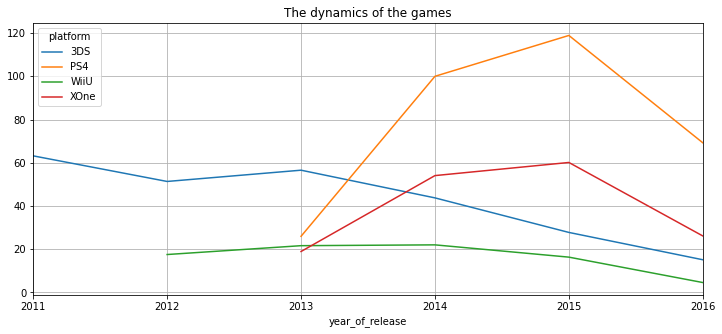

In [50]:
#  let's build a table to see which platforms are leading in sales, growing or falling
leading_platforms = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
display(leading_platforms.sort_values(by='total_sales', ascending=False))
data.query('platform in ["PS4", "XOne", "3DS", "WiiU"]').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5), title = 'The dynamics of the games')

The table and the graph show that the highest sales figures has PS4, XOne and 3DS platforms (in 2015 and 2016). However, the graph shows that their sales was declining since 2015.

### Boxplot on global game sales (by platform)

Text(0.5, 1.0, 'Global game sales (by platform)')

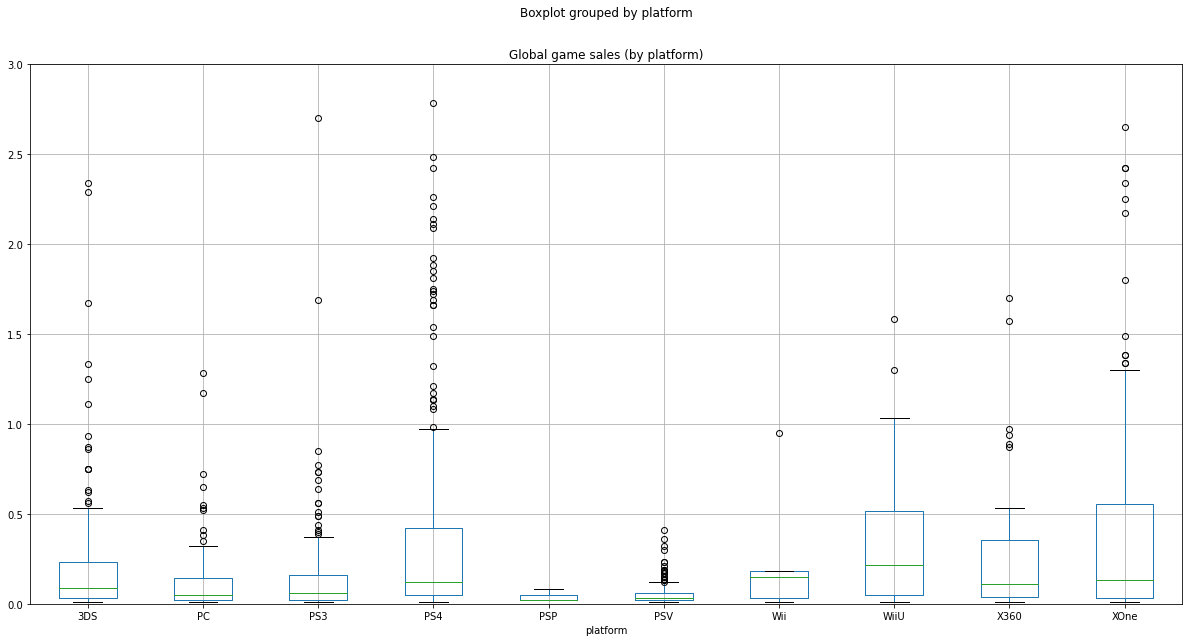

In [51]:
actual_data.boxplot(column = 'total_sales', by='platform', figsize=(20,10))
plt.ylim(0, 3)
plt.title('Global game sales (by platform)')

The boxplots show that XOne had the highest sales (the upper quartile boundary), followed by PS4 and WiiU. At the same time, their median values (green line) do not differ much. Also for PS4 there is a large number of outliers. There are fewer of them for XOne, 3DS and WiiU. Outliers are visible beyond the upper boundary, they are indicated by dots.

### The impact of user reviews and critics on sales within one popular platform

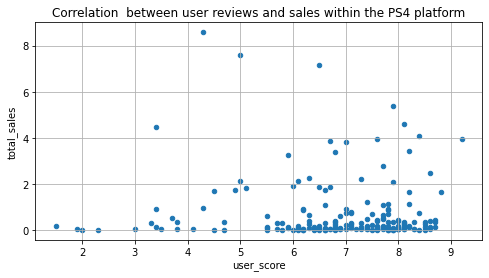

-0.05973845712638215


In [52]:
# Next, it is necessary to identify the correlation  between user reviews and sales within the PS4 platform
PS4_user_score = actual_data.query('platform == "PS4"')
PS4_user_score.plot(kind = 'scatter', x='user_score', y='total_sales', title ='Correlation  between user reviews and sales within the PS4 platform',  grid=True, figsize=(8,4))
plt.show()
# calculating the correlation
print(PS4_user_score['total_sales'].corr(PS4_user_score['user_score']))

From the scatter plot and from the correlation coefficient, it is obvious that there is no relationship between user reviews and sales.

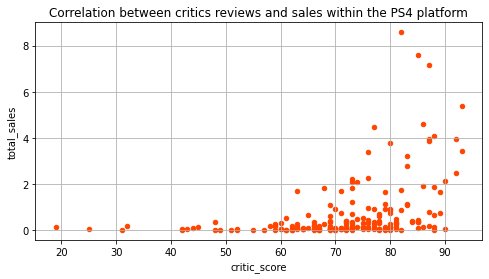

0.3928485555130601


In [53]:
# next, it is necessary to identify the correlation between critics' reviews and sales within the PS4 platform
PS4_critic_score = actual_data.query('platform == "PS4"')
PS4_critic_score.plot(kind = 'scatter', x='critic_score', y='total_sales', title ='Correlation between critics reviews and sales within the PS4 platform', color='orangered',  grid=True, figsize=(8,4))
plt.show()
# correlation
print(PS4_critic_score['total_sales'].corr(PS4_critic_score['critic_score']))

Critics' reviews have a stronger impact on sales. The chart shows sales growth where critics' ratings are higher. Also, the Pearson correlation coefficient is 0.39. This indicates the dependence, although it is not too strong.

### The impact of user reviews and critics on game sales on other platforms

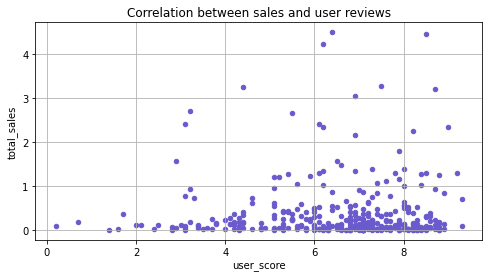

0.01752113065632156


In [54]:
# it is necessary to highlight other platforms and look at the correlation between sales and user reviews
other_user_score = actual_data.query('platform != "PS4"')
other_user_score.plot(kind = 'scatter', x='user_score', y='total_sales', title ='Correlation between sales and user reviews', color='slateblue',  grid=True, figsize=(8,4))
plt.show()
# getting correlation
print(other_user_score['total_sales'].corr(other_user_score['user_score']))


On other platforms user reviews also do not affect sales.

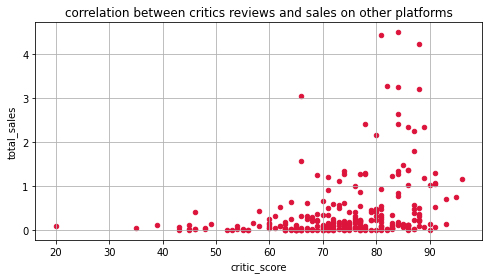

0.3032430209852095


In [55]:
# let's identify the correlation between critics' reviews and sales on other platforms
other_critic_score = actual_data.query('platform != "PS4"')
other_critic_score.plot(kind = 'scatter', x='critic_score', y='total_sales', title ='correlation between critics reviews and sales on other platforms', color='crimson',  grid=True, figsize=(8,4))
plt.show()
# getting the correlation
print(other_critic_score['total_sales'].corr(other_critic_score['critic_score']))

On other platforms there is also a correlation between critics' reviews and sales, it is slightly weaker than for the PS4 platform.

### Genre distribution of games 

In [56]:
# let's see which genres are more profitable than others
leading_genres = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
display(leading_genres.sort_values(by='total_sales', ascending=False))


,total_sales
genre,
Shooter,0.380
Sports,0.120
Role-Playing,0.115
Platform,0.100
Simulation,0.100
Fighting,0.090
Action,0.060
Misc,0.060
Racing,0.055


The table shows that the most profitable genres are Shooter, Sports and Role-Playing . Genres with the lowest sales rating are: Puzzle, Strategy and Adventure.

### Conclusion on the exploratory data analysis

In the exploratory analysis of the data, the following was determined.

1) It was revealed how many games were released in different years. Most games were released in the period from 2002 to 2011, in 2012 there was a drop in the release of games, since then the growth has remained insignificant. The peak of the release of games was observed from 2007 to 2009.

2) Sales of games on different platforms by year, which allowed us to establish that the average lifespan of the platform is 5 years.

3) An actual period (2 years) has been set for the basis of the future analysis. It was also determined that in the current period, the leading platforms were PS4, XOne and 3DS.

4) It was further revealed that user ratings do not affect game sales, while critics' ratings, on the contrary, show a certain correlation with sales, but this dependence is weak.

5) It was determined that the most profitable genres were Shooter, Sports and Role-Playing.


## User profile of each region

### Popular platforms of every region

In [57]:
# identifying the 5 platforms in North America
na_top_platforms = actual_data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
na_top_platforms['na_share, %'] = na_top_platforms['na_sales'] / na_top_platforms['total_sales'] * 100
display(na_top_platforms.sort_values(by='na_sales', ascending=False).head(5))

,na_sales,total_sales,"na_share, %"
platform,,,
PS4,63.86,188.15,33.941005
XOne,50.30,86.29,58.291807
3DS,10.31,42.92,24.021435
WiiU,8.86,20.95,42.291169
X360,8.05,13.48,59.718101


The table shows the sales rating by platform in North America. XOne and X360 have the largest share of total sales. Perhaps they produce the most popular games.

In [58]:
# identifying the top 5 platforms in Europe
eu_top_platforms = actual_data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
eu_top_platforms['eu_sales, %'] = eu_top_platforms['eu_sales'] / eu_top_platforms['total_sales'] * 100
display(eu_top_platforms.sort_values(by='eu_sales', ascending=False).head(5))

,eu_sales,total_sales,"eu_sales, %"
platform,,,
PS4,83.54,188.15,44.400744
XOne,28.10,86.29,32.564608
PC,9.10,13.77,66.085694
3DS,7.39,42.92,17.218080
PS3,7.30,20.42,35.749265


The table shows the sales rating by platform in Europe. PC and PS4 have the largest share of total sales, although in absolute terms the first 2 places are occupied by PS4 and XOne.

In [59]:
# the-top 5 platforms in Japan
jp_top_platforms = actual_data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
jp_top_platforms['jp_sales, %'] = jp_top_platforms['jp_sales'] / jp_top_platforms['total_sales'] * 100
display(jp_top_platforms.sort_values(by='jp_sales', ascending=False).head(5))

,jp_sales,total_sales,"jp_sales, %"
platform,,,
3DS,23.55,42.92,54.869525
PS4,12.05,188.15,6.404465
PSV,8.41,10.50,80.095238
PS3,4.97,20.42,24.338883
WiiU,4.12,20.95,19.665871


In Japan, 3DS is the leader in terms of sales, but its relative share ranks second - 55%. PSV, occupying 80% of all sales, is the third most popular platform. Perhaps a very popular game was released on it and it was being sold only in Japan.

### Popular genres by region

In [60]:
# # top-5 genres in North America
na_top_genres = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
display(na_top_genres.sort_values(by='na_sales', ascending=False).head(5))

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


Americans love Shooter, Action и Sports.

In [61]:
# top-5 genres in Europe
eu_top_genres = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
display(eu_top_genres.sort_values(by='eu_sales', ascending=False).head(5))

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


Europeans also love Shooter, Action and Sports, but they like to shoot a little less than Americans.

In [62]:
# top-5 genres in Japan
jp_top_genres = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
display(jp_top_genres.sort_values(by='jp_sales', ascending=False).head(5))

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


Japan prefers Action and Role-Playing. Shooting games occupy only 3%, while Sport did not enter the top 5 at all.

### The impact of the ESRB rating on sales in the regions

Text(0.5, 1.0, 'The impact of the ESRB rating on sales in North America')

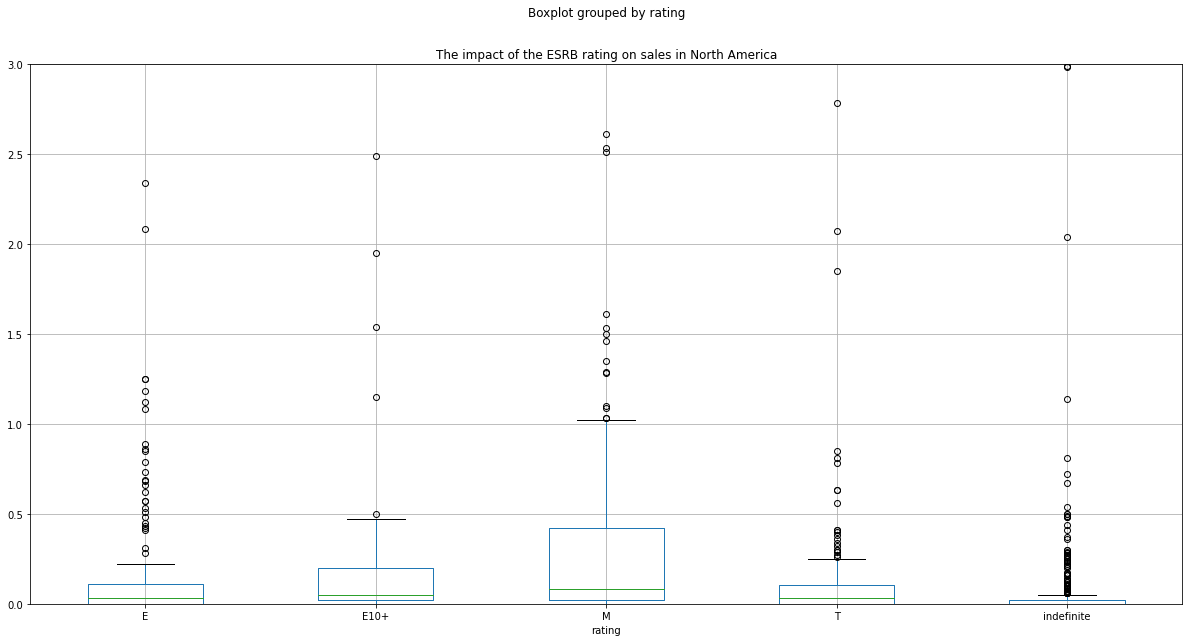

In [65]:
# let's build a histogram of the scope to see how the ESRB rating affects sales in North America
actual_data.boxplot(column ='na_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('The impact of the ESRB rating on sales in North America')

The span diagram shows where the median passes. It can be used to assess how the rating affects sales in the region. In this case, the highest sales are for games with M rating, followed by E10+, E and T, the last three are approximately at the same level.

Text(0.5, 1.0, 'The impact of the ESRB rating on sales in Europe')

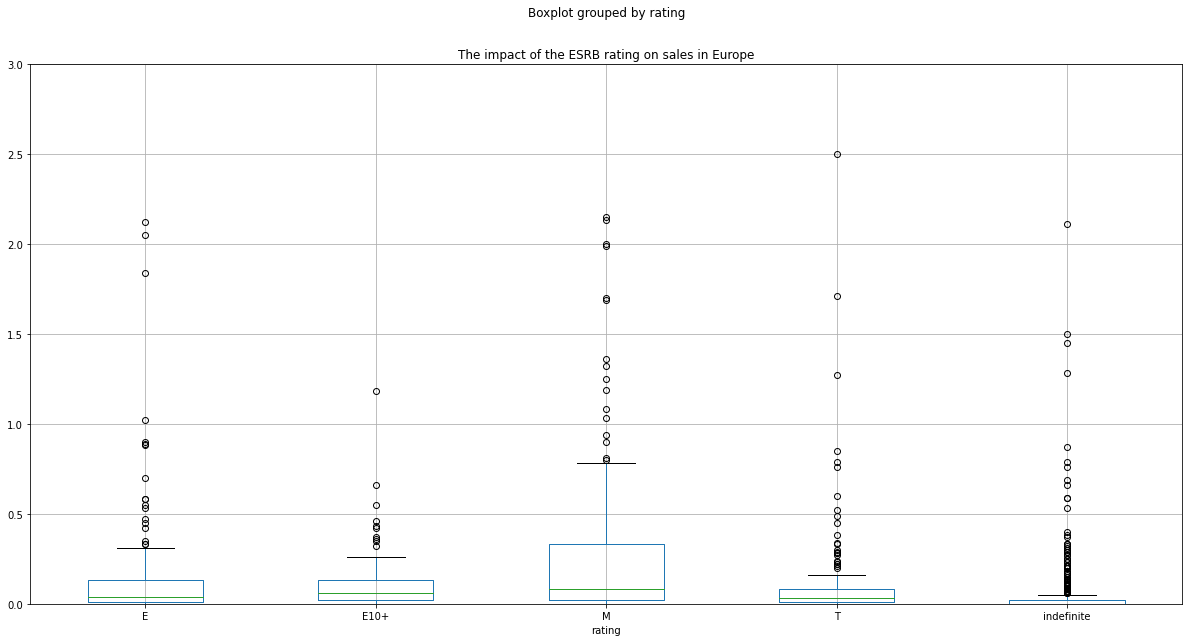

In [66]:
# let's build a histogram of the scope to see how the ESRB rating affects sales in Europe
actual_data.boxplot(column ='eu_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('The impact of the ESRB rating on sales in Europe')

In this case, M-rated games have the highest sales, followed by E10+ and E.

Text(0.5, 1.0, 'The impact of the ESRB rating on sales in Japan')

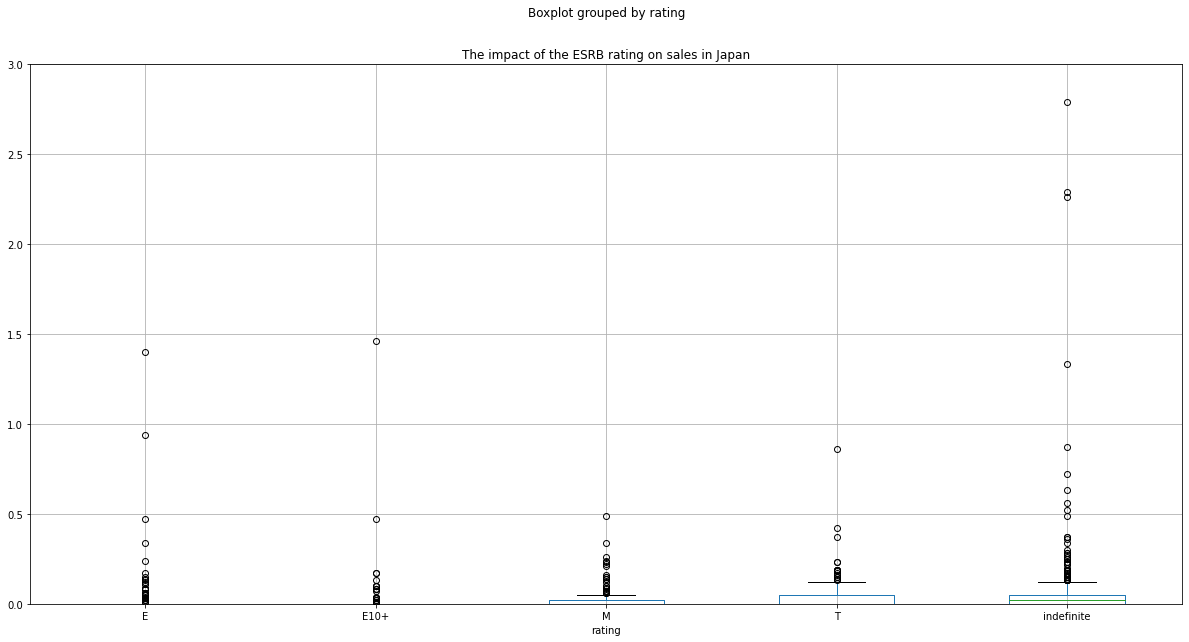

In [67]:
# let's build a histogram of the scope to see how the ESRB rating affects sales in Japan
actual_data.boxplot(column ='jp_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('The impact of the ESRB rating on sales in Japan')

In Japan, it is difficult to determine the impact of the rating. In the case where the median is viewed, the rating is not defined. This can be explained by the fact that Japan does not assign the rating that exists for games in North America and Europe.

### Conclusions on user profiles

User profile in North America:

- top 5 platforms: PS4 (33% of the market), XOne (58% of the market), 3DS (24% of the market), WiiU (42% of the market) and X360 (59% of the market);
- top 5 genres: Shooter, Action, Sports, Role-Playing, Misc;
- the highest sales are for games with a rating of M, followed by E10+, E, etc.


User profile in Europe:

- top 5 platforms: PS4 (44% of the market), XOne (32% of the market), PC (66% of the market), 3DS (17% of the market) and PS3 (35% of the market);
- top 5 genres: Shooter, Action, Sports, Role-Playing, Racing;
- M-rated games have the highest sales, followed by E10+ and E.



User profile in Japan:

- top 5 platforms are: 3DS (55% of the market), PS4 (6% of the market), PSV (80% of the market), PS3 (24% of the market) and WiiU (20% of the market);
- top 5 genres: Action, Role-Playing, Shooter, Misc, Adventure;
- the ESRB rating is not used in Japan.


Thus, the most popular platform in North America and Europe is the PS4, in Japan it ranks 2nd. In Europe and America, XOne is also very popular, while in Europe it did not enter the top 5. In Japan, 3DS  is in the first place in the  rating, in Europe and North America it is not so popular.

North America and Europe have similar tastes in genres - Shooter, Action, Sports, Role-Playing in the first places. In Japan  the genres of Action, Role-Playing, Shooter take the first places.

The ESRB rating is obviously used only in North America and Europe.




## Hypothesis testing

### Testing the hypothesis that the average user ratings of the Xbox One and PC platforms are the same

Let's set the condition that the user ratings of the Xbox One and PC platforms are the same, it is H0 (zero hypothesis), then H1 (alternate hypothesis) states that the ratings of the Xbox One and PC platforms are different. Let's set a threshold value of 5% and test the two-sided hypothesis.

In [68]:
xbox_users = actual_data.query('platform == "XOne"')
pc_users = actual_data.query('platform == "PC"')

xbox_users.dropna(subset = ['user_score'], inplace=True)
pc_users.dropna(subset = ['user_score'], inplace=True)

alpha = .05
results = st.ttest_ind(
    xbox_users['user_score'],
    pc_users['user_score'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Refute the null hypothesis")
else:
    print("Cannot refute the null hypothesis") 


p-значение 0.2778542084733835
Cannot refute the null hypothesis


It was not possible to refute the null hypothesis - the user rating for Xbox One and PC is the same.

### Testing the hypothesis that the average user ratings of the Action and Sports genres are different

Let's set the condition that the user ratings of the Action and Sports genres are the same. It is the H0 (null hypothesis), then H1 (alternate hypothesis) states that the ratings of the Action and Sports genres are different. Let's set a threshold value of 5% and test the two-sided hypothesis.

In [69]:
action_lovers = actual_data.query('genre == "Action"')
sport_lovers = actual_data.query('genre == "Sports"')

action_lovers.dropna(subset = ['user_score'], inplace=True)
sport_lovers.dropna(subset = ['user_score'], inplace=True)

alpha = .05
results = st.ttest_ind(
    action_lovers['user_score'],
    sport_lovers['user_score'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Refute the null hypothesis")
else:
    print("Cannot refute the null hypothesis") 

p-значение 1.0012846807938657e-13
Refute the null hypothesis


We refute the null hypothesis - the ratings of the Action and Sports genres are different.

### Conclusion based on hypotheses

After the t-test, it was determined that
- The user rating for Xbox One and PC is the same;
- the user rating for the Action and Sports genres is different.

## General conclusion

The analytical report was prepared for the online store "Stream" that sells computer games worldwide. Based on game sales data such as user and expert ratings, genres and platforms (for example, Xbox or PlayStation), it was necessary to identify patterns that determine the success of the game in order to bet on a potentially popular product and plan advertising campaigns. Data was available up to 2017.

At the first stage of the analysis, the data was studied and prepared for further work. The table contains 16715 rows and 11 columns, it has  data of the object and float64 types. As a result of the data preprocessing, the data types in Year_of_Release were replaced with datetime and in the user_score graph with float. In the rating column, the gaps were replaced with indefinite. The gaps in year_of_release were removed, since their share is 1.6%. We also created a  with calculations of total revenue for all regions.

At the next stage, an exploratory  analysis of the data was carried out. In the exploratory analysis of the data, it was determined how many games were released in different years,  the sales of games on different platforms were analyzed for each year, which allowed us to establish that the average lifespan of the platform is 5 years. An actual period (2 years) has been set for the basis of future analysis. It was also determined that in the current period, the leading platforms were PS4, XOne and 3DS. Further, it was revealed that user ratings did not affect game sales, while critics' ratings, on the contrary, show a certain correlation with sales, but this dependence is weak. We also managed to identify the most profitable genres, these are Shooter, Sports and Role-Playing.
Next, a user profile was compiled for North America, Europe and Japan. According to the results of the analysis, we found out that the most popular platform in North America and Europe was PS4, in Japan it ranked 2nd. In Europe and America, XOne were also very popular, while in Europe it did not enter the top 5. In Japan, in the first place of the 3DS rating, in Europe and NA it was not so popular. North America and Europe prefer the same genres: Shooter, Action, Sports, Role-Playing. In Japan the first places are occupied by Action, Role-Playing, Shooter. The ESRB rating is obviously used only in North America and Europe.

According to the results of statistical analysis, the hypothesis was confirmed that the user rating of Xbox One and PC is the same, and that the user rating of the Action and Sports genres is different.

In order to place a bet on a potentially popular product and plan advertising campaigns, the following factors must be taken into account:

- it is necessary to understand in which regions which platforms are popular now. Keeping in mind the fact that the platform lives for about 5 years, it is necessary to take into account the stage of its development.
- it is important to understand in which region which platform is popular.
- it is worth paying attention to what genres the target audience prefers in a particular region.
